In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from wordcloud import WordCloud
import string
from IPython.display import Image
from tqdm import tqdm
import requests
from bs4 import BeautifulSoup 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [20]:
# IMPORTAMOS EL DATASET:

path = r"C:\Users\Lenovo\Documents\CURSO DATA SCIENCE - NEBULOVA\Archivos\PROYECTO AIRBNB\airbnb-listings.csv"
dataset = pd.read_csv(path, sep=";")

In [21]:
dataset_new = dataset.loc[:,["ID",
                "Name",
                "Summary",
                "Description",
                "Space",
                "Minimum Nights",
                "Maximum Nights",
                "Guests Included",
                "Amenities",
                "Beds",
                "Bedrooms",
                "Bathrooms",
                "Accommodates",
                "Room Type",
                "Property Type",
                "City",
                "Country",
                "Price",
                "Review Scores Value",
                "Number of Reviews",
                "Geolocation"
                ]]

In [22]:
# FILTRAMOS PARA QUEDARNOS SOLO CON ESPAÑA:

dataset_new = dataset_new[dataset_new['Country'] == "Spain"]
filtro = ["Madrid", "Barcelona"]
dataset_new1 = dataset_new[dataset_new.City.isin(filtro)]

In [6]:
dataset = dataset_new1

In [7]:
# ANALISIS DE COLUMNAS:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30638 entries, 0 to 45838
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   30638 non-null  int64  
 1   Name                 30637 non-null  object 
 2   Summary              29501 non-null  object 
 3   Description          30630 non-null  object 
 4   Space                22138 non-null  object 
 5   Minimum Nights       30638 non-null  int64  
 6   Maximum Nights       30638 non-null  int64  
 7   Guests Included      30638 non-null  int64  
 8   Amenities            30406 non-null  object 
 9   Beds                 30553 non-null  float64
 10  Bedrooms             30592 non-null  float64
 11  Bathrooms            30547 non-null  float64
 12  Accommodates         30638 non-null  int64  
 13  Room Type            30638 non-null  object 
 14  Property Type        30638 non-null  object 
 15  City                 30638 non-null 

In [7]:
# VISTA GENERAL DE LOS DATOS:
dataset.describe()

,ID,Minimum Nights,Maximum Nights,Guests Included,Beds,Bedrooms,Bathrooms,Accommodates,Price,Review Scores Value,Number of Reviews
count,3.063800e+04,30638.000000,3.063800e+04,30638.000000,30553.000000,30592.000000,30547.000000,30638.000000,30587.000000,24153.000000,30638.000000
mean,9.989135e+06,3.212742,2.144235e+05,1.620635,2.127058,1.428282,1.273808,3.310203,78.307059,9.100774,23.237222
std,5.641975e+06,10.769923,2.125701e+07,1.210782,1.703015,0.914627,0.591560,2.137929,74.684877,0.980489,37.831497
min,1.093800e+04,1.000000,1.000000e+00,1.000000,0.000000,0.000000,0.000000,1.000000,9.000000,2.000000,0.000000
25%,5.010346e+06,1.000000,1.200000e+02,1.000000,1.000000,1.000000,1.000000,2.000000,35.000000,9.000000,1.000000
50%,1.081947e+07,2.000000,1.125000e+03,1.000000,2.000000,1.000000,1.000000,2.000000,59.000000,9.000000,7.000000
75%,1.509646e+07,3.000000,1.125000e+03,2.000000,3.000000,2.000000,1.500000,4.000000,95.000000,10.000000,29.000000
max,1.811022e+07,1125.000000,2.147484e+09,16.000000,16.000000,10.000000,8.000000,16.000000,999.000000,10.000000,446.000000


In [8]:
# LIMPIEZA DE VALORES NULOS PARA COLUMNAS OBJECT:

for i in range(dataset.shape[1]):
    if dataset.iloc[:,i].dtype == 'O':
        dataset.iloc[:, i].fillna("N.A", inplace=True)

In [9]:
# LIMPIEZA DE VALORES NULOS PARA LOS RATINGS    :

dataset.iloc[:, 18].fillna(dataset.iloc[:,18].mean(), inplace=True)

In [10]:
# AL HABER POCOS VALORES NULOS, DESCARTAMOS LAS COLUMNAS QUE TENGAN ALGÚN VALOR NULO:
dataset.dropna(inplace=True)

C:\Users\Lenovo\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [11]:
# COMPROBAMOS QUE YA NO TENEMOS VALORES NULOS:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30425 entries, 0 to 45838
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   30425 non-null  int64  
 1   Name                 30425 non-null  object 
 2   Summary              30425 non-null  object 
 3   Description          30425 non-null  object 
 4   Space                30425 non-null  object 
 5   Minimum Nights       30425 non-null  int64  
 6   Maximum Nights       30425 non-null  int64  
 7   Guests Included      30425 non-null  int64  
 8   Amenities            30425 non-null  object 
 9   Beds                 30425 non-null  float64
 10  Bedrooms             30425 non-null  float64
 11  Bathrooms            30425 non-null  float64
 12  Accommodates         30425 non-null  int64  
 13  Room Type            30425 non-null  object 
 14  Property Type        30425 non-null  object 
 15  City                 30425 non-null 

<AxesSubplot:xlabel='Review Scores Value', ylabel='count'>

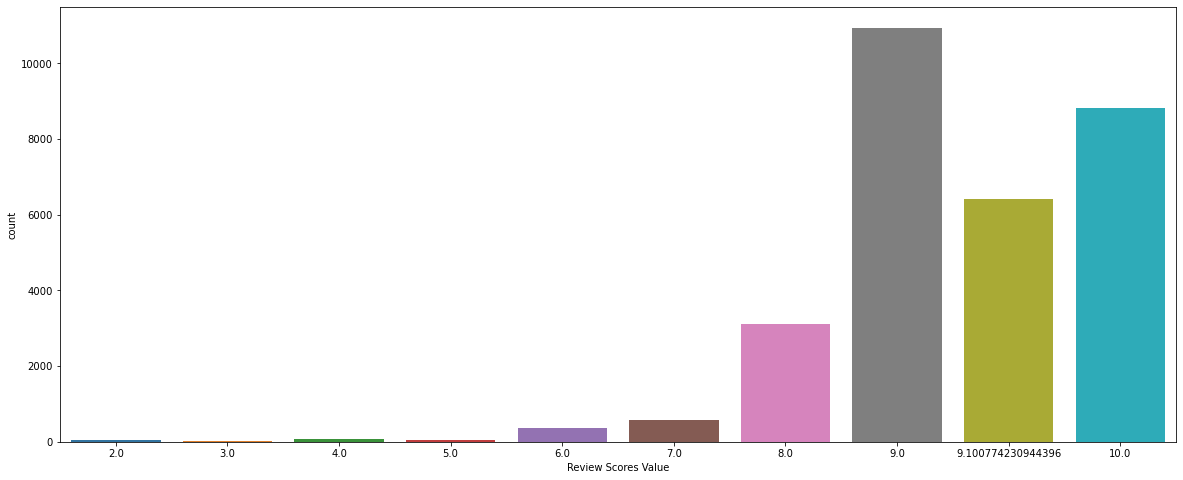

In [12]:
# DISTRIBUCIÓN DE PUNTUACIONES:
f, ax = plt.subplots(figsize=(20, 8))
sns.countplot(x="Review Scores Value", data=dataset)

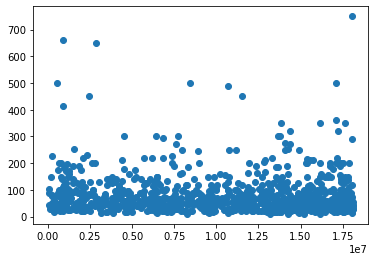

In [13]:
# DISTRIBUCIÓN DE LOS PRECIOS EN UNA MUESTRA DE LOS 1000 PRIMEROS:
x = dataset["ID"].head(1000)
y = dataset["Price"].head(1000)
plt.scatter(x,y)
plt.show()

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


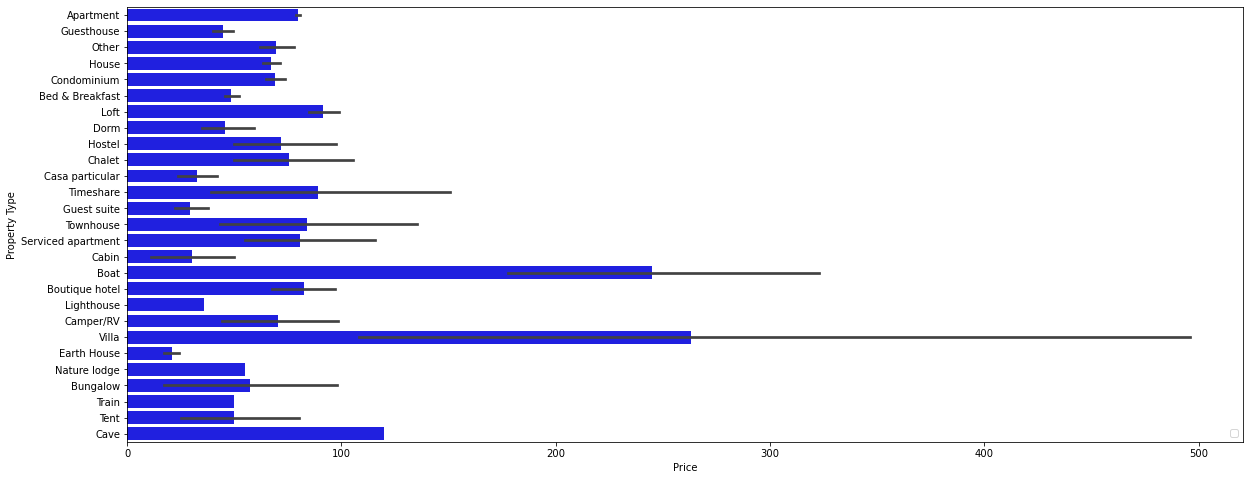

In [14]:
# PRECIOS EN FUNCIÓN DEL TIPO DE PROPIEDAD:
f, ax = plt.subplots(figsize=(20, 8))
sns.barplot(dataset["Price"], dataset["Property Type"], color="b")
ax.legend(ncol=2, loc="lower right", frameon=True)

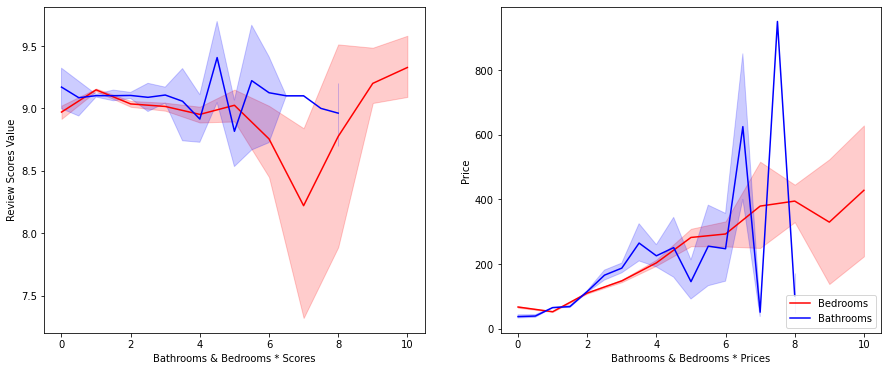

In [15]:
# AFECTACIÓN DEL PRECIO 

f, axs = plt.subplots(1, 2, figsize=(15, 6), gridspec_kw=dict(width_ratios=[6, 6]))
sns.lineplot(data=dataset, x="Bedrooms", y="Review Scores Value", ax=axs[0], color="r").set_xlabel("Bathrooms & Bedrooms * Scores")
sns.lineplot(data=dataset, x="Bathrooms", y="Review Scores Value", ax=axs[0], color="b")
sns.lineplot(data=dataset, x="Bedrooms", y="Price", ax=axs[1], color="r").set_xlabel("Bathrooms & Bedrooms * Prices")
sns.lineplot(data=dataset, x="Bathrooms", y="Price", ax=axs[1], color="b")
plt.legend(["Bedrooms", "Bathrooms"], loc="lower right")

In [14]:
# CORRELACIONES:
dataset[["Bathrooms","Bedrooms", "Accommodates", "Price", "Review Scores Value"]].corr()

,Bathrooms,Bedrooms,Accommodates,Price,Review Scores Value
Bathrooms,1.000000,0.451286,0.405563,0.359721,-0.007068
Bedrooms,0.451286,1.000000,0.755780,0.549971,-0.049089
Accommodates,0.405563,0.755780,1.000000,0.582600,-0.097322
Price,0.359721,0.549971,0.582600,1.000000,-0.039593
Review Scores Value,-0.007068,-0.049089,-0.097322,-0.039593,1.000000


<AxesSubplot:>

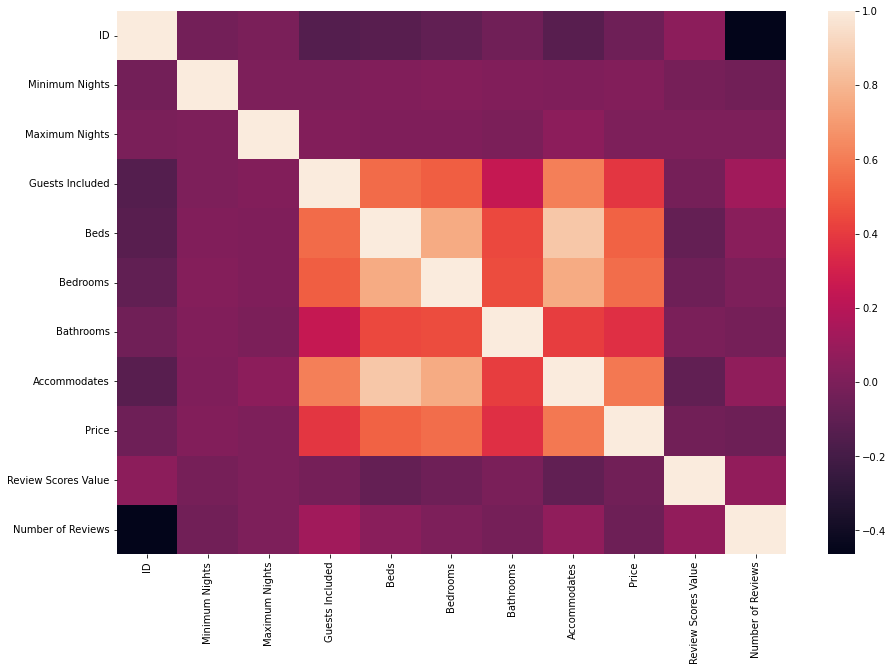

In [17]:
# MAPA DE CALOR:
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(dataset.corr())
# Observamos que las columnas Maximum Nights y Minimum Nights no parecen tener demasiada correlación con las demás. Sin embargo, existem columnas muy correlacionadas,
# como aquellas que hacen referencia a los Accommodates y las camas, las habitaciones, los baños...

In [15]:
# HACEMOS UN RESETEO DE INDEX:
dataset.reset_index(inplace=True)

In [19]:
# API DE OPENTRIPMAPS: 5ae2e3f221c38a28845f05b6b0145f9726612eba2821086dff2d18a1

In [20]:
# DESCARGAR DATOS DE OPENTRIPMAPS DE TODAS LAS GEOLOCATIONS PARA PUNTOS DE INTERES (POI)
# QUE ESTÉN A MENOS DE 500 METROS DE CADA UNO DE LOS LISTINGS:

# list_closest = list()
# for i in tqdm(range(5000)):
#     i = i + 22701
#     lat = dataset.Geolocation[i].split(",")[0]
#     lon = dataset.Geolocation[i].split(",")[1]
#     distancia = 500
#     url = f"https://api.opentripmap.com/0.1/en/places/radius?radius={distancia}&lon={lon}&lat={lat}&format=json&apikey=5ae2e3f221c38a28845f05b6b0145f9726612eba2821086dff2d18a1"
#     prueba = requests.get(url)
#     prueba1 = json.loads(prueba.text)
#     for it in range(len(prueba1)):
#         id_listing = dataset.ID[i]
#         id_poi = prueba1[it]["xid"]
#         name_poi = prueba1[it]["name"]
#         dist_poi = prueba1[it]["dist"]
#         kinds_poi = prueba1[it]["kinds"]
#         dict_listing = {"id_listing": id_listing,
#                         "id_poi": id_poi,
#                         "dist_poi": dist_poi,
#                         "kinds_poi": kinds_poi.split(",")}
#         list_closest.append(dict_listing)
# list_close = pd.DataFrame(list_closest)

Para descargar los datos de manera más eficiente nos hemos dividido y creado 7 archivos csv con la información:
DANI: 0-4900 https://drive.google.com/file/d/1xA9g-geTrghCFxD68yBDaWNWHKKCcxjX/view?usp=sharing
EDU: 4901 – 7891  https://drive.google.com/file/d/1yQ8PbBFYNZ-SWhumgKyzZZPlXQ9w_v0Q/view?usp=sharing
SUSANA: 7892 - 12800 https://drive.google.com/file/d/1PP10CsT0ii7yWf2WdczjL3DOjDtOUe7F/view?usp=sharing
DANI: 12801 - 17700 https://drive.google.com/file/d/1TzOD7iidl9fXB-WL2Rx4MNSFd6abq4bj/view?usp=sharing
EDU: 17701 – 22700  https://drive.google.com/file/d/1Ccrkmh36WwUE6Soz9uWdnnoMunz81Cxw/view?usp=sharing
DANI: 22701 - 27701 https://drive.google.com/file/d/1wSJ87z9JGlPChgmVrbqMmCG9YN8VASyu/view?usp=sharing
SUSANA: 27702 - HASTA EL FINAL https://drive.google.com/file/d/1_-gAKja1-ax-WlZxEeNaUG3sER6NZ7Xt/view?usp=sharing

In [3]:
path1 = r"C:\Users\Lenovo\Documents\CURSO DATA SCIENCE - NEBULOVA\Archivos\PROYECTO AIRBNB\kinds\0-4900.csv"
path2 = r"C:\Users\Lenovo\Documents\CURSO DATA SCIENCE - NEBULOVA\Archivos\PROYECTO AIRBNB\kinds\4901_7891.csv"
path3 = r"C:\Users\Lenovo\Documents\CURSO DATA SCIENCE - NEBULOVA\Archivos\PROYECTO AIRBNB\kinds\7892_12800.csv"
path4 = r"C:\Users\Lenovo\Documents\CURSO DATA SCIENCE - NEBULOVA\Archivos\PROYECTO AIRBNB\kinds\12801-17700.csv"
path5 = r"C:\Users\Lenovo\Documents\CURSO DATA SCIENCE - NEBULOVA\Archivos\PROYECTO AIRBNB\kinds\17701_22700.csv"
path6 = r"C:\Users\Lenovo\Documents\CURSO DATA SCIENCE - NEBULOVA\Archivos\PROYECTO AIRBNB\kinds\17701_22700.csv"
path7 = r"C:\Users\Lenovo\Documents\CURSO DATA SCIENCE - NEBULOVA\Archivos\PROYECTO AIRBNB\kinds\27702_30638.csv"
kind1 = pd.read_csv(path1)
kind2 = pd.read_csv(path2)
kind3 = pd.read_csv(path3)
kind4 = pd.read_csv(path4)
kind5 = pd.read_csv(path5)
kind6 = pd.read_csv(path6)
kind7 = pd.read_csv(path7)
kinds_global = pd.concat([kind1, kind2, kind3, kind4, kind5, kind6, kind7])

In [4]:
kinds_global.reset_index(inplace=True)

In [5]:
kinds_global_agrupada = kinds_global.groupby('id_listing').agg({"kinds_poi":"sum"}).reset_index()

In [6]:
# SCRAPEAMOS LAS CATEGORÍAS

url = "https://opentripmap.io/catalog.en.json"
cat = requests.get(url)
cat = json.loads(cat.text)
listcat = []
for i in cat["children"]:
    for e in i["children"]:
        listcat.append(e["id"])
        if "children" in e.keys():
            for a in e["children"]:
                listcat.append(a["id"])
           
    

In [10]:
listcat = ["beaches", 
                "geological_formations", 
                "nature_reserves",
                "water",
                "view_points",
                "buddhist_temples",
                "cathedrals",
                "synagogues",
                "churches",
                "climbing",
                "stadiums",
                "banks",
                "foods",
                "shops",
                "archaeology",
                "fortifications",
                "historical_places",
                "monuments_and_memorials",
                "museums",
                "theatres_and_entertainments",
                "bridges",
                "historic_architecture",
                "towers",
                "skyscrapers"]

In [11]:
conteoclas = pd.DataFrame(columns=["id_listing"])
# prueba_monuments = kinds_global["kinds_poi"].astype(str).str.count("monuments")
for clas in listcat:
    print(f"{listcat.index(clas) + 1} / {len(listcat)} -- Buscando el elemento: {clas}")
    for row in tqdm(range(kinds_global_agrupada.shape[0])):
        conteoclas.loc[row,"id_listing"] = kinds_global_agrupada.id_listing[row]
        conteoclas.loc[row,clas] = kinds_global_agrupada.kinds_poi[row].count(clas)
    print(f"{conteoclas[clas].sum()} coincidencias encontradas para el elemento {clas}")

1 / 24 -- Buscando el elemento: beaches


100%|██████████| 25489/25489 [01:01<00:00, 412.02it/s]


2357.0 coincidencias encontradas para el elemento beaches
2 / 24 -- Buscando el elemento: geological_formations


100%|██████████| 25489/25489 [00:51<00:00, 496.55it/s]


2840.0 coincidencias encontradas para el elemento geological_formations
3 / 24 -- Buscando el elemento: nature_reserves


100%|██████████| 25489/25489 [00:43<00:00, 583.11it/s]


103.0 coincidencias encontradas para el elemento nature_reserves
4 / 24 -- Buscando el elemento: water


100%|██████████| 25489/25489 [00:38<00:00, 661.42it/s]


2867.0 coincidencias encontradas para el elemento water
5 / 24 -- Buscando el elemento: view_points


100%|██████████| 25489/25489 [00:38<00:00, 665.03it/s]


14059.0 coincidencias encontradas para el elemento view_points
6 / 24 -- Buscando el elemento: buddhist_temples


100%|██████████| 25489/25489 [00:36<00:00, 700.92it/s]


710.0 coincidencias encontradas para el elemento buddhist_temples
7 / 24 -- Buscando el elemento: cathedrals


100%|██████████| 25489/25489 [00:34<00:00, 731.27it/s]


5091.0 coincidencias encontradas para el elemento cathedrals
8 / 24 -- Buscando el elemento: synagogues


100%|██████████| 25489/25489 [00:37<00:00, 678.36it/s]


2074.0 coincidencias encontradas para el elemento synagogues
9 / 24 -- Buscando el elemento: churches


100%|██████████| 25489/25489 [00:37<00:00, 680.34it/s]


305034.0 coincidencias encontradas para el elemento churches
10 / 24 -- Buscando el elemento: climbing


100%|██████████| 25489/25489 [00:39<00:00, 645.32it/s]


14.0 coincidencias encontradas para el elemento climbing
11 / 24 -- Buscando el elemento: stadiums


100%|██████████| 25489/25489 [00:40<00:00, 623.63it/s]


780.0 coincidencias encontradas para el elemento stadiums
12 / 24 -- Buscando el elemento: banks


100%|██████████| 25489/25489 [00:36<00:00, 694.59it/s]


3034.0 coincidencias encontradas para el elemento banks
13 / 24 -- Buscando el elemento: foods


100%|██████████| 25489/25489 [00:36<00:00, 705.21it/s]


33384.0 coincidencias encontradas para el elemento foods
14 / 24 -- Buscando el elemento: shops


100%|██████████| 25489/25489 [00:36<00:00, 698.86it/s]


9691.0 coincidencias encontradas para el elemento shops
15 / 24 -- Buscando el elemento: archaeology


100%|██████████| 25489/25489 [00:36<00:00, 691.80it/s]


14329.0 coincidencias encontradas para el elemento archaeology
16 / 24 -- Buscando el elemento: fortifications


100%|██████████| 25489/25489 [00:36<00:00, 707.58it/s]


33862.0 coincidencias encontradas para el elemento fortifications
17 / 24 -- Buscando el elemento: historical_places


100%|██████████| 25489/25489 [00:36<00:00, 695.15it/s]


15085.0 coincidencias encontradas para el elemento historical_places
18 / 24 -- Buscando el elemento: monuments_and_memorials


100%|██████████| 25489/25489 [00:37<00:00, 671.03it/s]


569749.0 coincidencias encontradas para el elemento monuments_and_memorials
19 / 24 -- Buscando el elemento: museums


100%|██████████| 25489/25489 [00:36<00:00, 694.32it/s]


199847.0 coincidencias encontradas para el elemento museums
20 / 24 -- Buscando el elemento: theatres_and_entertainments


100%|██████████| 25489/25489 [00:35<00:00, 716.40it/s]


304981.0 coincidencias encontradas para el elemento theatres_and_entertainments
21 / 24 -- Buscando el elemento: bridges


100%|██████████| 25489/25489 [00:36<00:00, 697.35it/s]


6214.0 coincidencias encontradas para el elemento bridges
22 / 24 -- Buscando el elemento: historic_architecture


100%|██████████| 25489/25489 [00:34<00:00, 736.77it/s]


394100.0 coincidencias encontradas para el elemento historic_architecture
23 / 24 -- Buscando el elemento: towers


100%|██████████| 25489/25489 [00:34<00:00, 730.92it/s]


11308.0 coincidencias encontradas para el elemento towers
24 / 24 -- Buscando el elemento: skyscrapers


100%|██████████| 25489/25489 [00:35<00:00, 727.23it/s]

5429.0 coincidencias encontradas para el elemento skyscrapers


In [17]:
conteoclas.to_csv("conteo_de_clases10_02_2022.csv")

In [32]:
df_final1

,ID,Beds,Bedrooms,Bathrooms,Accommodates,Room Type,City,Price
0,3150371,1.0,1.0,1.0,2,Private room,Madrid,36.0
1,3378181,1.0,1.0,1.0,2,Entire home/apt,Madrid,85.0
2,2070750,1.0,1.0,1.0,2,Private room,Madrid,20.0
3,9832499,2.0,1.0,1.0,4,Entire home/apt,Madrid,112.0
4,1868170,4.0,3.0,3.0,8,Entire home/apt,Madrid,190.0
...,...,...,...,...,...,...,...,...
45839,17473013,6.0,3.0,1.0,6,Entire home/apt,L'Hospitalet de Llobregat,60.0
45840,17783398,1.0,1.0,1.0,1,Private room,L'Hospitalet de Llobregat,25.0
45841,18066180,3.0,0.0,1.0,4,Entire home/apt,L'Hospitalet de Llobregat,60.0
45842,17811715,1.0,1.0,1.0,1,Private room,L'Hospitalet de Llobregat,14.0


In [ ]:

# dataset['ID'] = dataset['ID'].astype(str) # chequear que no tiene nan
# id_rbnb = set(dataset['ID']) # unicos id de rbnb
# tipos = ['sport', 'cultural', 'natural'] # lista con nombres de cada tipo
# result = {​'ID':list(id_rbnb), 'sport':[], 'cultural': [], 'natural': []}​

# for i in tipos:    
#     result[i].extend([sum(df.loc[df['id_rbnb'] == j,'string'].str.contains(i)) for j in id_rbnb])

In [39]:
# COGEMOS LOS DATOS NECESARIOS DE LA OTRA TABLA:

df_final1 = dataset[["ID","Beds","Bedrooms","Bathrooms","Accommodates","Room Type","City","Price"]]
df_final_def = df_final1.merge(conteoclas, on="id_listing", how="left")

C:\Users\Lenovo\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [25]:
# EXTRAEMOS INFO DE LA COLUMNA AMENITIES:

# dataset.reset_index(inplace=True)
# amenities = ["TV","Internet","Kitchen","Heating","Elevator","Washer","Air conditioning","parking"]
# conteoameties = pd.DataFrame(columns=["id_listing"])
# for ame in amenities:
#     print(f"{amenities.index(ame) + 1} / {len(amenities)} -- Buscando el elemento: {ame}")
#     for row in tqdm(range(dataset.shape[0])):
#         conteoameties.loc[row,"id_listing"] = dataset.ID[row]
#         conteoameties.loc[row,ame] = dataset.Amenities[row].count(ame)
#     print(f"{conteoameties[ame].sum()} coincidencias encontradas para el elemento {ame}")

1 / 8 -- Buscando el elemento: TV


100%|██████████| 30425/30425 [02:17<00:00, 221.74it/s]


25412.0 coincidencias encontradas para el elemento TV
2 / 8 -- Buscando el elemento: Internet


100%|██████████| 30425/30425 [01:20<00:00, 379.26it/s]


45954.0 coincidencias encontradas para el elemento Internet
3 / 8 -- Buscando el elemento: Kitchen


100%|██████████| 30425/30425 [01:25<00:00, 357.19it/s]


27717.0 coincidencias encontradas para el elemento Kitchen
4 / 8 -- Buscando el elemento: Heating


100%|██████████| 30425/30425 [01:18<00:00, 385.52it/s]


24828.0 coincidencias encontradas para el elemento Heating
5 / 8 -- Buscando el elemento: Elevator


100%|██████████| 30425/30425 [01:12<00:00, 422.47it/s]


18601.0 coincidencias encontradas para el elemento Elevator
6 / 8 -- Buscando el elemento: Washer


100%|██████████| 30425/30425 [01:01<00:00, 496.70it/s]


24673.0 coincidencias encontradas para el elemento Washer
7 / 8 -- Buscando el elemento: Air conditioning


100%|██████████| 30425/30425 [01:01<00:00, 497.71it/s]


15796.0 coincidencias encontradas para el elemento Air conditioning
8 / 8 -- Buscando el elemento: parking


100%|██████████| 30425/30425 [01:00<00:00, 504.12it/s]

1675.0 coincidencias encontradas para el elemento parking


In [26]:
conteoameties

,id_listing,TV,Internet,Kitchen,Heating,Elevator,Washer,Air conditioning,parking
0,3150371,1.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0
1,3378181,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
2,2070750,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0
3,9832499,1.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0
4,1868170,1.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
30420,16344584,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
30421,12247076,0.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0
30422,12808754,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
30423,15576078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
# COMPROBAMOS QUE HAY COLUMNAS QUE NO TOMAN 0 Y 1. SINO QUE SE CUELAN ALGUNOS 2.
conteoameties.describe()

,TV,Internet,Kitchen,Heating,Elevator,Washer,Air conditioning,parking
count,30425.000000,30425.000000,30425.000000,30425.000000,30425.000000,30425.000000,30425.000000,30425.000000
mean,0.835234,1.510403,0.910994,0.816039,0.611372,0.810945,0.519178,0.055053
std,0.585987,0.578818,0.284757,0.387458,0.487446,0.392314,0.499640,0.228376
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
50%,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000


In [28]:
# CORREGIMOS LO ANTERIOR:
# conteoameties_copy = conteoameties.copy()
# for i in tqdm(["TV","Internet","Washer","parking"]):
#     for row in range(conteoameties.shape[0]):
#         if conteoameties.loc[row,i] != 0:
#             conteoameties.loc[row,i] = 1

100%|██████████| 4/4 [00:41<00:00, 10.49s/it]


In [181]:
# COMPROBAMOS QUE SE HA CORREGIDO:
conteoameties.describe()

,TV,Internet,Kitchen,Heating,Elevator,Washer,Air conditioning,parking
count,30425.000000,30425.000000,30425.000000,30425.000000,30425.000000,30425.000000,30425.000000,30425.000000
mean,0.732358,0.957436,0.910994,0.816039,0.611372,0.810649,0.519178,0.054988
std,0.442737,0.201875,0.284757,0.387458,0.487446,0.391794,0.499640,0.227960
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
# Unimos la tabla que acabamos de hacer con la anterior:

df_final.columns

Index(['id_listing', 'natural', 'cultural', 'historic', 'religion',
       'architecture', 'view_points', 'sport', 'climbing', 'casino', 'foods',
       'shops', 'stadiums'],
      dtype='object')

In [188]:
conteoameties.columns

Index(['id_listing', 'TV', 'Internet', 'Kitchen', 'Heating', 'Elevator',
       'Washer', 'Air conditioning', 'parking'],
      dtype='object')

In [30]:
df_final_def = df_final.merge(conteoameties, on="id_listing", how="right")

In [31]:
# RELLENAMOS LOS NAN CON CEROS:
df_final_def.fillna(0, inplace=True)

In [32]:
# INCLUIMOS EN LA TABLA EL RESTO DE INFORMACIÓN:
df_final1["id_listing"] = df_final1["ID"]
df_final1.drop(columns="ID")
df_final_def = df_final_def.merge(df_final1, on="id_listing")

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_15416/3975303841.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final1["id_listing"] = df_final1["ID"]


In [35]:
df_final_def

,id_listing,natural,cultural,historic,religion,architecture,view_points,sport,climbing,casino,...,Air conditioning,parking,ID,Beds,Bedrooms,Bathrooms,Accommodates,Room Type,City,Price
0,3150371.0,0.0,19.0,40.0,10.0,11.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3150371,1.0,1.0,1.0,2,0,0,36.0
1,3378181.0,0.0,75.0,162.0,29.0,45.0,2.0,0.0,0.0,0.0,...,1.0,0.0,3378181,1.0,1.0,1.0,2,1,0,85.0
2,2070750.0,0.0,21.0,44.0,11.0,13.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2070750,1.0,1.0,1.0,2,0,0,20.0
3,9832499.0,0.0,61.0,75.0,7.0,23.0,1.0,0.0,0.0,0.0,...,1.0,0.0,9832499,2.0,1.0,1.0,4,1,0,112.0
4,1868170.0,0.0,41.0,45.0,7.0,13.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1868170,4.0,3.0,3.0,8,1,0,190.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30420,16344584.0,0.0,10.0,6.0,3.0,10.0,0.0,0.0,0.0,0.0,...,1.0,0.0,16344584,1.0,1.0,1.0,1,0,1,23.0
30421,12247076.0,0.0,12.0,4.0,3.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,12247076,1.0,1.0,2.0,2,0,1,15.0
30422,12808754.0,0.0,14.0,3.0,2.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,12808754,1.0,1.0,1.0,2,0,1,30.0
30423,15576078.0,0.0,6.0,5.0,2.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,15576078,1.0,1.0,1.0,2,0,1,24.0


In [34]:
# HACEMOS LABEL ENCODER A LA COLUMNA CITY
# def mapeaColumna(columna):
#     mapeo = dict()
#     i = 0
#     for cat in columna.unique():
#         mapeo[cat] = i
#         i += 1
#     columna.replace(mapeo, inplace=True)
#     return columna, mapeo

# mapeos_columnas = dict()
# for col in df_final_def.columns:
#     if df_final_def.loc[:,col].dtype == object:
#         nueva_columna, mapeo = mapeaColumna(df_final_def.loc[:,col])
#         df_final_def.loc[:,col] = nueva_columna
#         mapeos_columnas[col] = mapeo

In [37]:
# SACAMOS LA TABLA DEFINITIVA:
#PERO ANTES BORRAMOS LA COLUMNA DUPLICADA "ID"
df_final_def.drop(columns="ID", inplace=True)
df_final_def.to_csv("tabla_definitiva_para_predecir.csv")

A PARTIR DE AQUÍ, EMPEZAMOS CON LA FASE DE PREDICCIÓN:

In [102]:
path = r"C:\Users\Lenovo\Documents\CURSO DATA SCIENCE - NEBULOVA\Archivos\PROYECTO AIRBNB\conteo_de_clases10_02_2022.csv"
conteoclas = pd.read_csv(path)

In [104]:
conteoclas.drop(columns="Unnamed: 0", inplace=True)
# df_final_def.drop(columns="climbing", inplace=True) # vamos a eliminar el grupo de "escalada" ya que es muy escaso y nos desvirtua

In [105]:
# ELIMINAMOS LA COLUMNA "id_listing":

conteoclas.drop(columns="id_listing", inplace=True)

In [106]:
X = conteoclas.values

In [107]:
scaler_X = MinMaxScaler()
scaler_X.fit(X)
X = scaler_X.transform(X)

In [120]:
km = KMeans(n_clusters=15, random_state=0).fit(X)

In [121]:
y_km = km.fit_predict(X)

In [122]:
vector_dist = km.transform(X)
vector_dist = pd.DataFrame(vector_dist)

In [123]:
cluster = km.labels_
cluster

array([14,  2,  4, ...,  2, 14, 10])

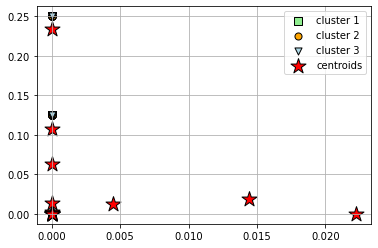

In [124]:
# plot the 3 clusters
plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[y_km == 2, 0], X[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [125]:
conteoclas["cluster"] = cluster

In [126]:
conteoclas

,beaches,geological_formations,nature_reserves,water,view_points,buddhist_temples,cathedrals,synagogues,churches,climbing,...,fortifications,historical_places,monuments_and_memorials,museums,theatres_and_entertainments,bridges,historic_architecture,towers,skyscrapers,cluster
0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,6.0,0.0,0.0,14
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,30.0,0.0,...,15.0,0.0,22.0,40.0,9.0,0.0,48.0,0.0,0.0,2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,7.0,0.0,5.0,2.0,0.0,4
3,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,14.0,0.0,...,0.0,1.0,47.0,4.0,11.0,0.0,6.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,2.0,2.0,3.0,0.0,5.0,0.0,0.0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25484,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,8.0,0.0,...,0.0,0.0,0.0,14.0,14.0,0.0,10.0,0.0,0.0,13
25485,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,26.0,0.0,...,0.0,0.0,44.0,4.0,19.0,0.0,10.0,0.0,0.0,1
25486,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,32.0,0.0,...,7.0,2.0,16.0,23.0,24.0,2.0,55.0,2.0,1.0,2
25487,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,3.0,1.0,2.0,3.0,0.0,1.0,0.0,0.0,14


In [115]:
conteoclas.columns

Index(['beaches', 'geological_formations', 'nature_reserves', 'water',
       'view_points', 'buddhist_temples', 'cathedrals', 'synagogues',
       'churches', 'climbing', 'stadiums', 'banks', 'foods', 'shops',
       'archaeology', 'fortifications', 'historical_places',
       'monuments_and_memorials', 'museums', 'theatres_and_entertainments',
       'bridges', 'historic_architecture', 'towers', 'skyscrapers', 'cluster'],
      dtype='object')

In [127]:
pv = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0,0,0,0,0,0,0,0,0,0,0,0]

In [128]:
km.predict([pv])

array([14])

In [93]:
conteoclas.loc[:,"cluster"].value_counts()

1    12894
2     4924
5     4489
3     1129
0     1111
4      942
Name: cluster, dtype: int64

In [73]:
lista_prueba1 = vector_dist.sort_values(by = 6).iloc[:100,0].index.tolist()
df_prueba1 = df_final_def1.iloc[lista_prueba1,:].head(100).describe().transpose()

In [ ]:
inertias = []
for i in tqdm(range(1, 25)):
    km = KMeans(n_clusters=i)
    km.fit(X)
    inertias.append(km.inertia_)
plt.plot(range(1, 25), inertias)

In [13]:
# CORRELACIONES:
conteoclas.corr()

,beaches,geological_formations,nature_reserves,water,view_points,buddhist_temples,cathedrals,synagogues,churches,climbing,...,archaeology,fortifications,historical_places,monuments_and_memorials,museums,theatres_and_entertainments,bridges,historic_architecture,towers,skyscrapers
beaches,1.000000,-0.028579,-0.006100,0.124824,-0.062542,-0.016407,-0.030220,-0.028188,-0.082411,-0.002183,...,-0.025149,-0.030253,-0.023502,-0.056191,-0.056088,-0.078917,-0.031576,-0.060524,0.093176,-0.006990
geological_formations,-0.028579,1.000000,0.250776,-0.006610,0.273598,-0.037849,0.163919,0.448522,0.280572,-0.005036,...,0.529661,0.547626,0.038715,-0.016121,0.405962,0.032150,0.259512,0.417432,0.110269,-0.030157
nature_reserves,-0.006100,0.250776,1.000000,-0.013892,0.161195,-0.008078,-0.014879,-0.013879,-0.031402,-0.001075,...,-0.010991,-0.014051,-0.011572,-0.029312,-0.007979,-0.045035,0.009219,0.065652,-0.017648,-0.016936
water,0.124824,-0.006610,-0.013892,1.000000,0.145835,-0.037366,-0.026157,-0.033926,-0.052666,-0.004971,...,0.106472,0.109120,-0.039960,-0.084286,0.053155,0.064644,-0.002773,0.133670,0.264530,-0.008294
view_points,-0.062542,0.273598,0.161195,0.145835,1.000000,-0.078169,0.284156,0.122610,0.430007,0.045122,...,0.238958,0.216045,-0.043568,0.495188,0.401908,0.439732,0.155081,0.311642,0.031315,0.124302
buddhist_temples,-0.016407,-0.037849,-0.008078,-0.037366,-0.078169,1.000000,-0.040021,-0.012776,-0.079731,-0.002891,...,-0.050492,-0.045831,-0.031124,-0.079412,-0.027786,-0.044892,-0.041817,0.020343,-0.057543,0.012282
cathedrals,-0.030220,0.163919,-0.014879,-0.026157,0.284156,-0.040021,1.000000,0.210264,0.533397,-0.005325,...,0.346016,0.356047,0.005747,0.524544,0.342748,0.115707,0.300048,0.299876,0.011798,-0.042197
synagogues,-0.028188,0.448522,-0.013879,-0.033926,0.122610,-0.012776,0.210264,1.000000,0.430849,-0.004967,...,0.685485,0.694362,0.092775,0.012615,0.567713,0.176756,0.348467,0.553394,0.250554,0.021304
churches,-0.082411,0.280572,-0.031402,-0.052666,0.430007,-0.079731,0.533397,0.430849,1.000000,-0.014860,...,0.588828,0.546048,0.038676,0.719272,0.740425,0.688109,0.343920,0.621685,0.090103,0.199261
climbing,-0.002183,-0.005036,-0.001075,-0.004971,0.045122,-0.002891,-0.005325,-0.004967,-0.014860,1.000000,...,-0.006718,-0.006098,-0.004141,-0.010249,-0.009148,-0.016431,-0.005564,-0.015369,-0.007656,-0.006061


In [95]:
conteoclas.columns

Index(['beaches', 'geological_formations', 'nature_reserves', 'water',
       'view_points', 'buddhist_temples', 'cathedrals', 'synagogues',
       'churches', 'climbing', 'stadiums', 'banks', 'foods', 'shops',
       'archaeology', 'fortifications', 'historical_places',
       'monuments_and_memorials', 'museums', 'theatres_and_entertainments',
       'bridges', 'historic_architecture', 'towers', 'skyscrapers', 'cluster'],
      dtype='object')

In [70]:
vector_input = np.zeros[24]

q1 = input("""Hola, bienvenido! Te voy a recomendar un alojamiento de AirBNB.\n
                Lo primero que me gustaría saber es: \n
                1 - Te gusta la naturaleza\n
                2 - Te gusta lo urbano\n
                3 - Un poco de cada""")

if "1" in q1 and "3" not in q1:
    q2 = input("""Entonces eres amante de la naturaleza!, entonces dime. Qué te gusta de aquí:
            1 - Playas
            2 - Formaciones Geológicas (como cuevas, montañas, etc)
            3 - Reservas naturales
            4 - Rios y lagos""")
    for i in range(4):
        if i in q2:
            vector_input[i] = 1
if "3" in q1:
    vector_input[3]

